<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Python - Google Colab/4. Intro to Neural Networks/Project - Bank Churn/bank-1.csv')    #load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# let's view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# let's view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
ds.shape

(10000, 14)

### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [ ]:
# let's check for missing values in the data
ds.isnull().sum() ## check missing entries in the train data

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

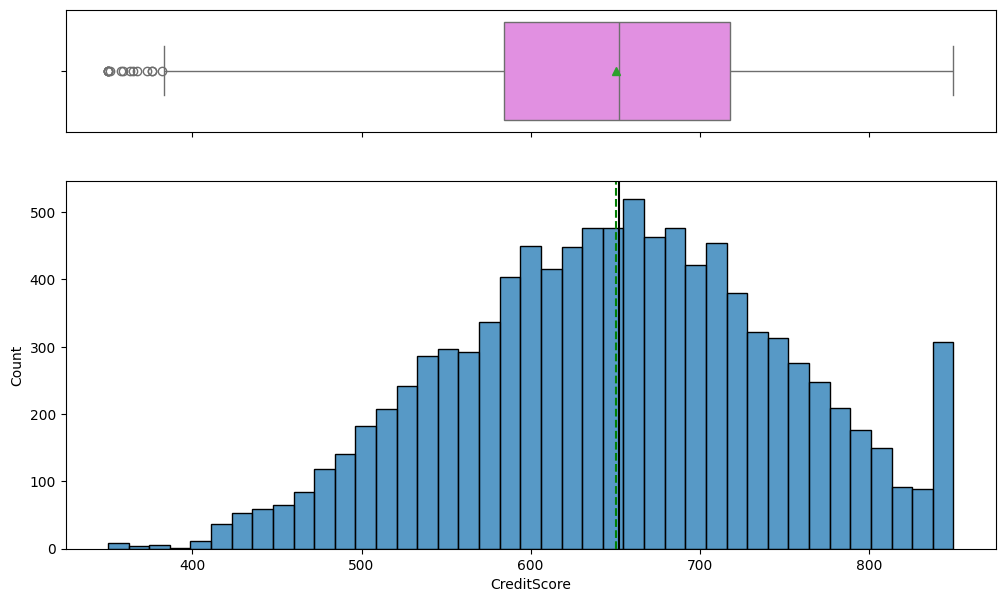

In [ ]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

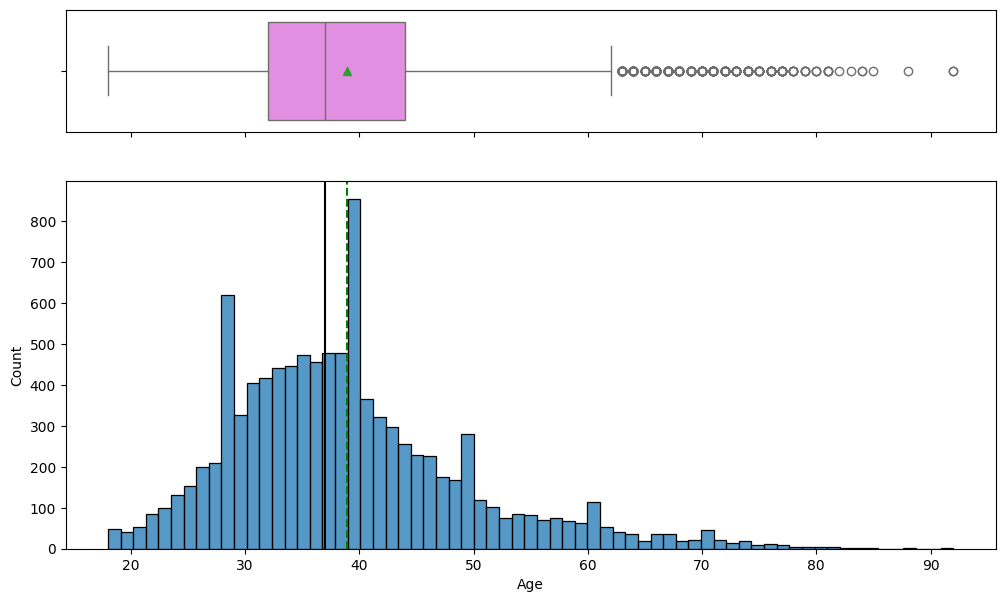

In [ ]:
histogram_boxplot(ds,'Age')          ## to create histogram_boxplot for Age

#### Observations on Balance

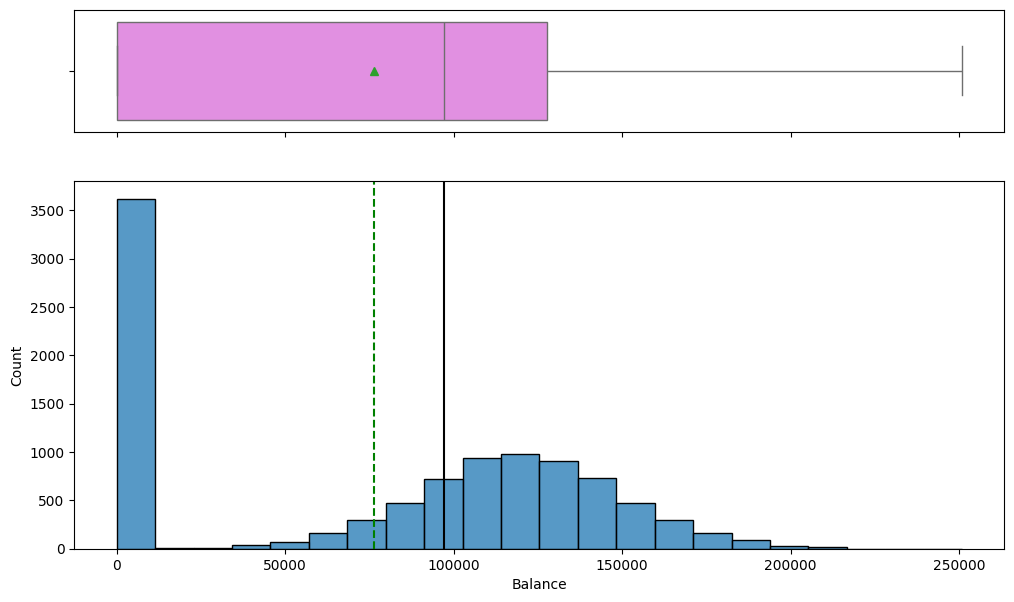

In [ ]:
histogram_boxplot(ds,'Balance')          ## to create histogram_boxplot for Balance

#### Observations on Estimated Salary

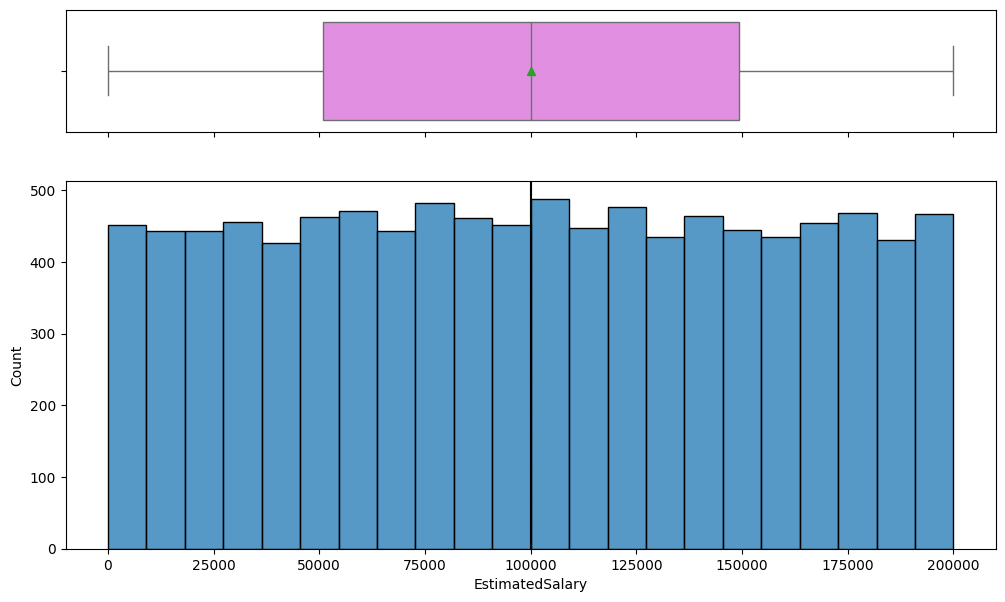

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')          ## to create histogram_boxplot for Estimated Salary

#### Observations on Exited

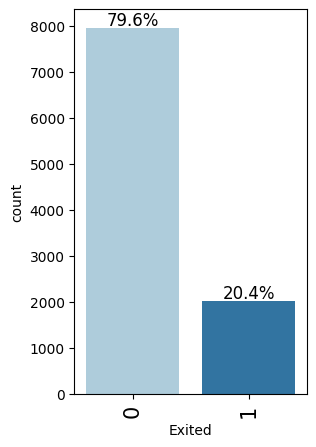

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

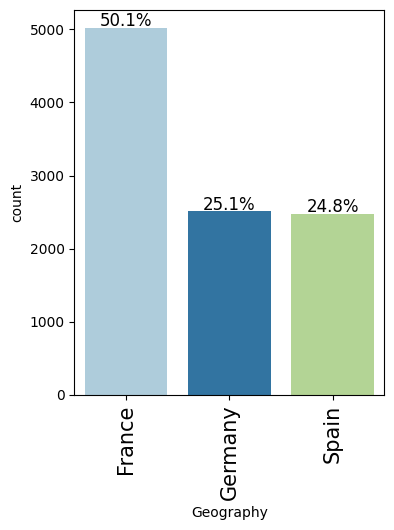

In [ ]:
labeled_barplot(ds, "Geography", perc=True)               ## to create labeled_barplot for Geography

#### Observations on Gender

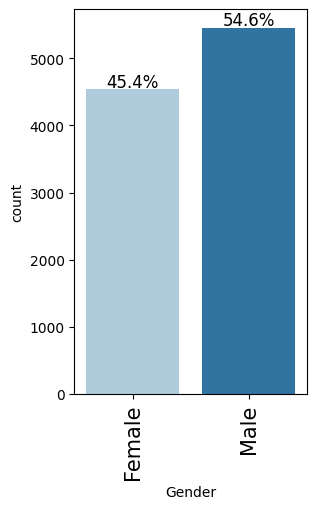

In [ ]:
labeled_barplot(ds, "Gender", perc=True)               ## to create labeled_barplot for Gender

#### Observations on Tenure

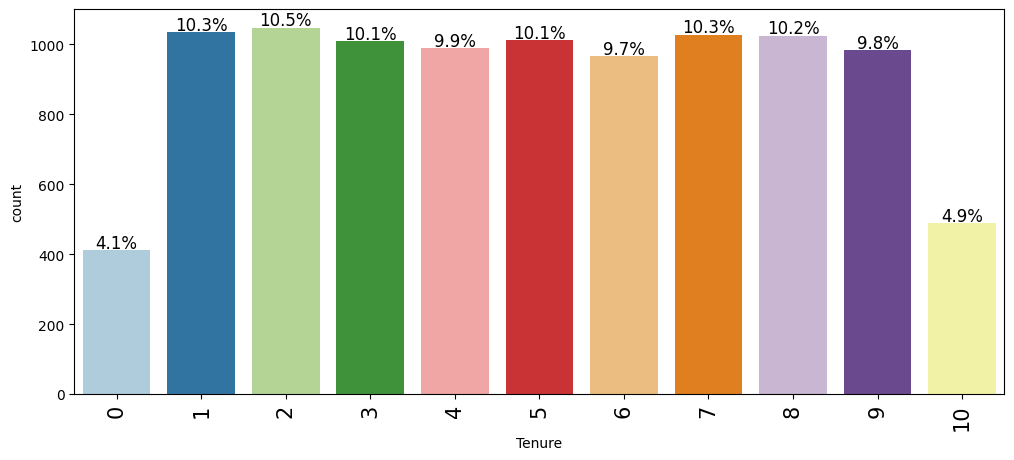

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)               ## to create labeled_barplot for Tenure

#### Observations on Number of Products

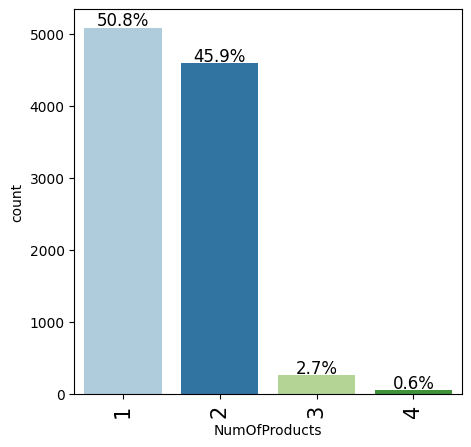

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)               ## to create labeled_barplot for Number of products

#### Observations on Has Credit Card

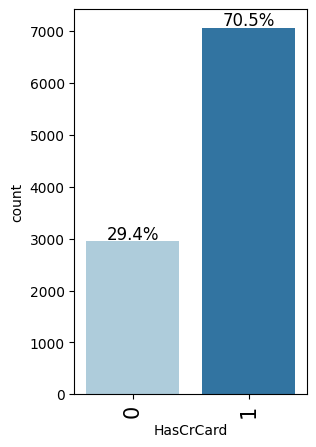

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)               ## to create labeled_barplot for Has credit card

#### Observations on Is Active Member

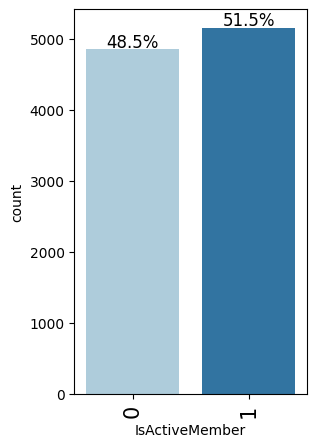

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)               ## to create labeled_barplot for Is active member

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

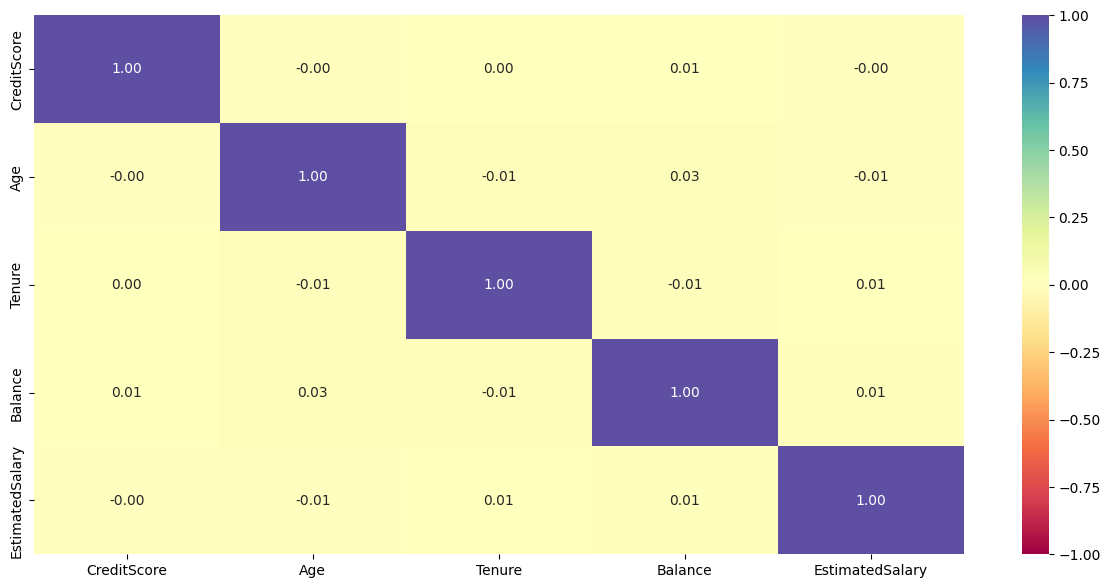

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


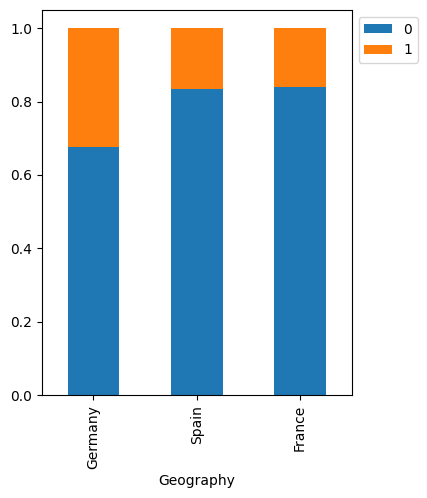

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


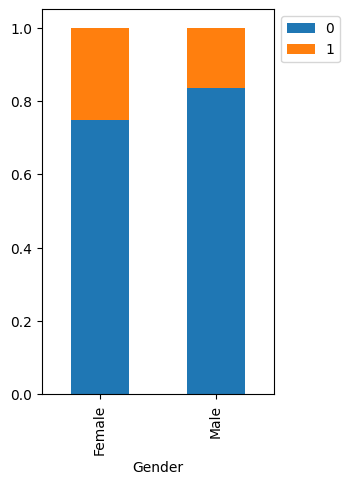

In [ ]:
stacked_barplot(ds, "Gender", "Exited")                   ## to plot stacked barplot for Exited and Gender

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


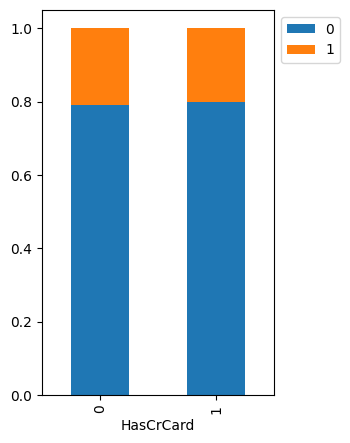

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited")                   ## to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


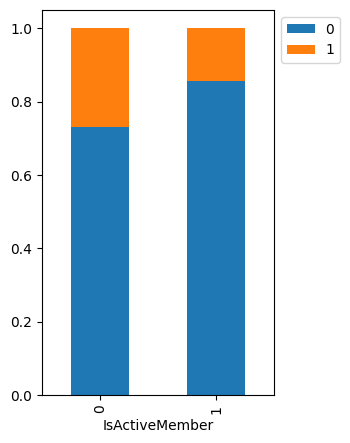

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   ## to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

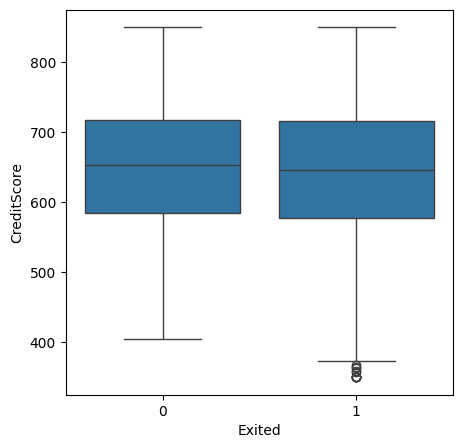

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

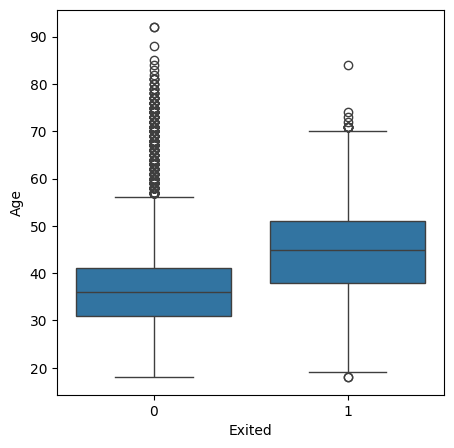

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

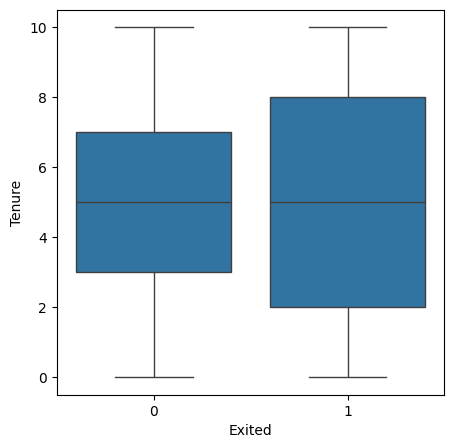

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

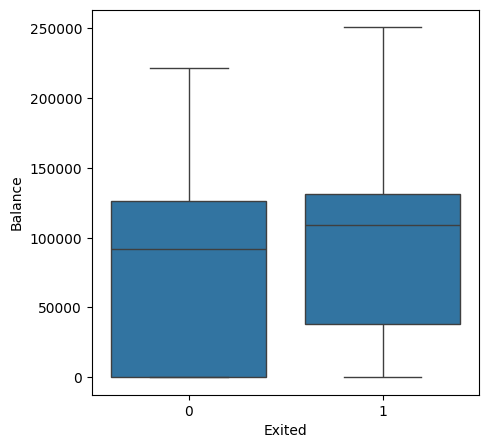

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

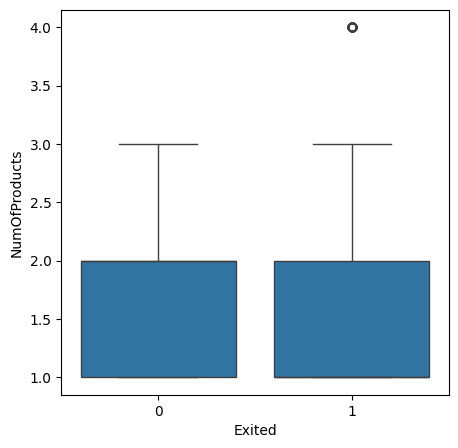

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

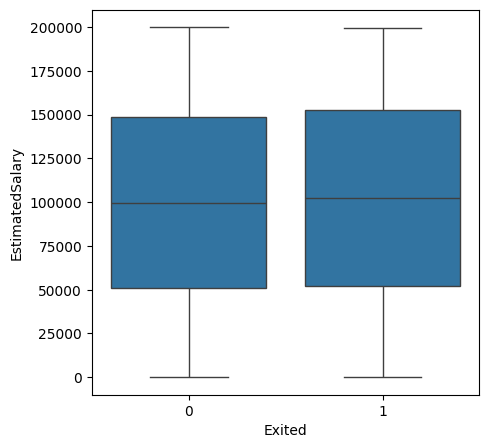

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## to plot the boxplot for Exited and Estimated Salary
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42,stratify=y,shuffle = True) ## to Split the X and y and obtain test set

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.176470, random_state = 42,stratify=y_large, shuffle = True) ## to Split X_large and y_large to obtain train and validation sets

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(7000, 11) (1500, 11) (1500, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(7000,) (1500,) (1500,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [ ]:
thold = 0.4   ## define the threshold
bsize = 100    ## define the batch size
epochs = 60   ## define the number of epochs

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(64, activation='tanh'))
# add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size= bsize,    ## to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs= epochs,    ## to specify the number of epochs
    verbose=1
)

Epoch 1/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6701 - recall: 0.2603 - val_loss: 0.6124 - val_recall: 0.0393
Epoch 2/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6007 - recall: 0.0352 - val_loss: 0.5675 - val_recall: 0.0033
Epoch 3/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5608 - recall: 0.0036 - val_loss: 0.5408 - val_recall: 0.0000e+00
Epoch 4/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5367 - recall: 0.0000e+00 - val_loss: 0.5241 - val_recall: 0.0000e+00
Epoch 5/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5215 - recall: 0.0000e+00 - val_loss: 0.5132 - val_recall: 0.0000e+00
Epoch 6/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5115 - recall: 0.0000e+00 - val_loss: 0.5057 - val_recall: 0.0000e+00
Epoch 7/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5044 - recall: 0.0000e+00 - val_loss: 0.5002 - val_recall: 0.0000e+00
Epoch 8/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4992 - recall: 0.0000e+00 - val_loss: 0.4960 - val

**Loss function**

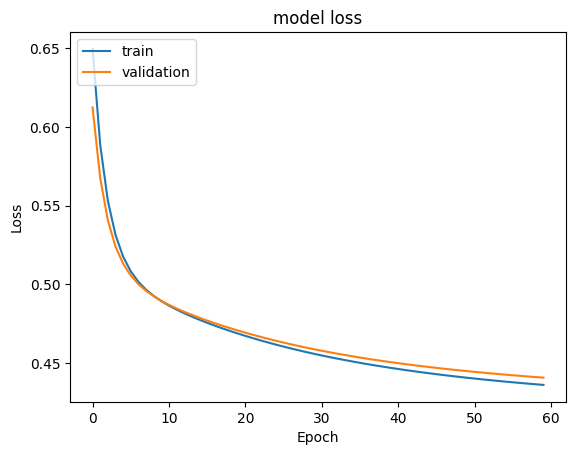

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

In [ ]:
print(history_0.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


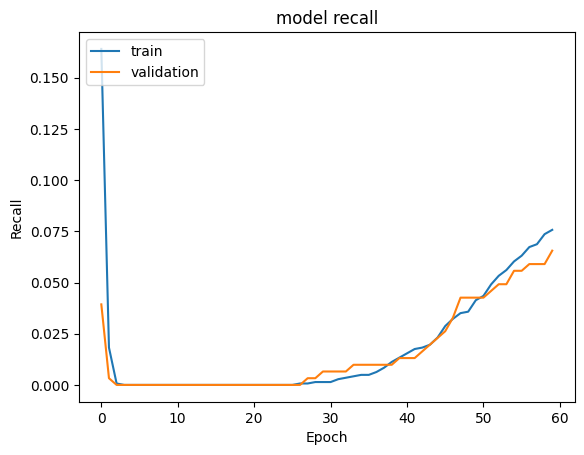

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > thold)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## to make prediction on the validation set
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      5574
         1.0       0.55      0.23      0.33      1426

    accuracy                           0.80      7000
   macro avg       0.69      0.59      0.61      7000
weighted avg       0.77      0.80      0.77      7000



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      1195
         1.0       0.58      0.26      0.36       305

    accuracy                           0.81      1500
   macro avg       0.71      0.61      0.63      1500
weighted avg       0.78      0.81      0.78      1500



**Confusion matrix**

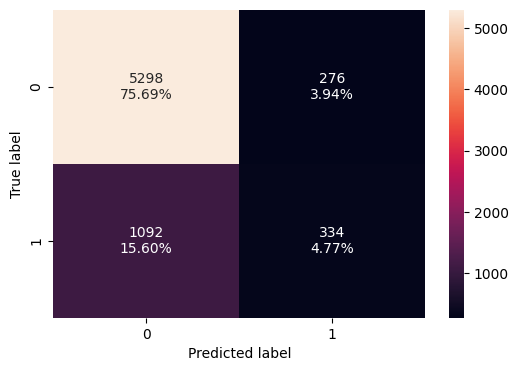

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

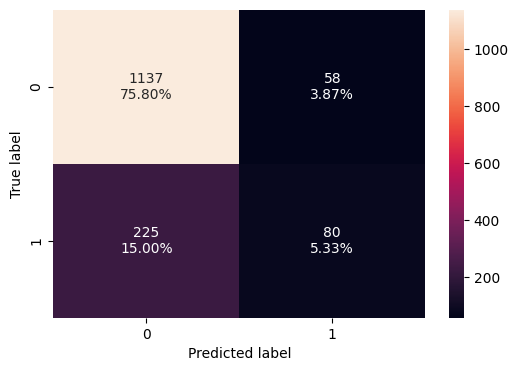

In [ ]:
make_confusion_matrix(y_val, y_val_pred)    ## to check the model's performance on the validation set

In [ ]:
results.loc[0] = [2,[128, 64],["relu", "tanh"],epochs,bsize,"SGD",0.001,"Xavier",None,history_0.history['loss'][-1],history_0.history['val_loss'][-1],recall_score(y_train, y_train_pred),recall_score(y_val, y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=bsize, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=epochs, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5320 - recall: 0.0357 - val_loss: 0.4345 - val_recall: 0.0984
Epoch 2/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4294 - recall: 0.1910 - val_loss: 0.4232 - val_recall: 0.2426
Epoch 3/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4159 - recall: 0.2508 - val_loss: 0.4160 - val_recall: 0.2787
Epoch 4/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4070 - recall: 0.2924 - val_loss: 0.4092 - val_recall: 0.3049
Epoch 5/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3998 - recall: 0.3241 - val_loss: 0.4031 - val_recall: 0.3279
Epoch 6/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3936 - recall: 0.3449 - val_loss: 0.3972 - val_recall: 0.3475
Epoch 7/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3876 - recall: 0.3554 - val_loss: 0.3915 - val_recall: 0.3607
Epoch 8/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3820 - recall: 0.3730 - val_loss: 0.3864 - val_recall: 0.3672
Epoch 9/60
70/70 ━━━━━━━

**Loss function**

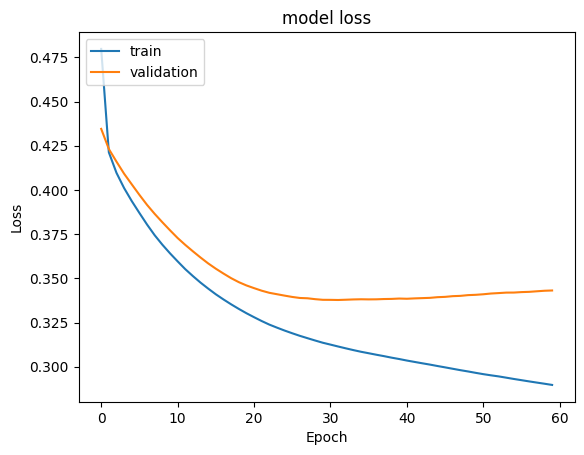

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

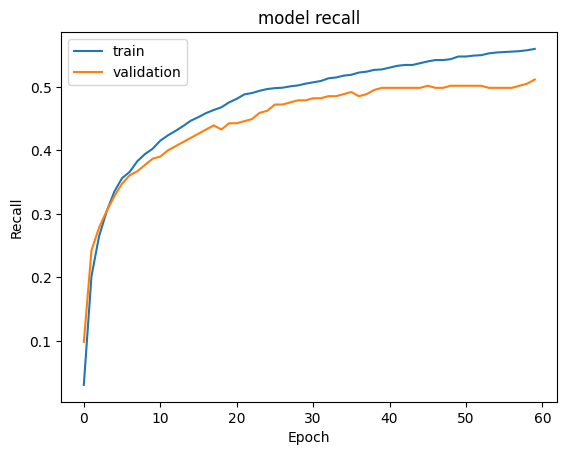

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > thold)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      5574
         1.0       0.75      0.64      0.69      1426

    accuracy                           0.88      7000
   macro avg       0.83      0.79      0.81      7000
weighted avg       0.88      0.88      0.88      7000



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1195
         1.0       0.67      0.58      0.62       305

    accuracy                           0.86      1500
   macro avg       0.79      0.75      0.77      1500
weighted avg       0.85      0.86      0.85      1500



**Confusion matrix**

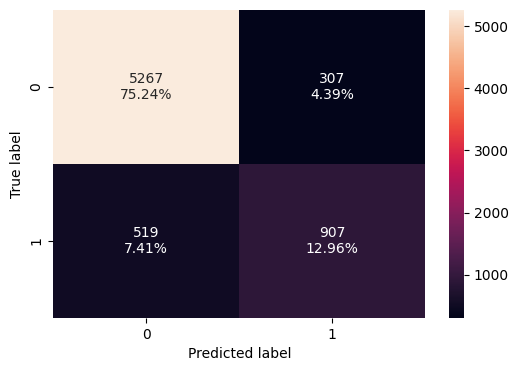

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

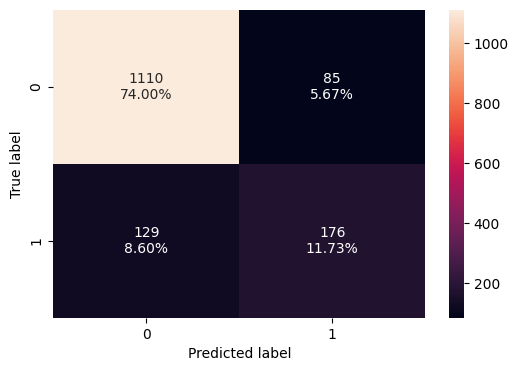

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

In [ ]:
results.loc[1] = [2,[64,32],["relu","relu"],epochs,bsize,"Adam",0.001,"Xavier",None,history_1.history['loss'][-1],history_1.history['val_loss'][-1], recall_score(y_train,y_train_pred), recall_score(y_val,y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295
1,2,"[64, 32]","[relu, relu]",60,100,Adam,0.001,Xavier,None,0.289691,0.343115,0.636045,0.577049


### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1],kernel_initializer='he_normal'))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.25))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='tanh'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.25))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=bsize,  ##Complete the code to specify the batch size.
    epochs=epochs, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5817 - recall: 0.1267 - val_loss: 0.4938 - val_recall: 0.0000e+00
Epoch 2/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5061 - recall: 0.0018 - val_loss: 0.4607 - val_recall: 0.0066
Epoch 3/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4797 - recall: 0.0390 - val_loss: 0.4364 - val_recall: 0.1574
Epoch 4/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4655 - recall: 0.1071 - val_loss: 0.4280 - val_recall: 0.2787
Epoch 5/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4558 - recall: 0.1765 - val_loss: 0.4248 - val_recall: 0.3049
Epoch 6/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4421 - recall: 0.1754 - val_loss: 0.4228 - val_recall: 0.2984
Epoch 7/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4425 - recall: 0.2095 - val_loss: 0.4193 - val_recall: 0.2754
Epoch 8/60
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4359 - recall: 0.1741 - val_loss: 0.4173 - val_recall: 0.2885
Epoch 9/60
70/70 ━━━

**Loss function**

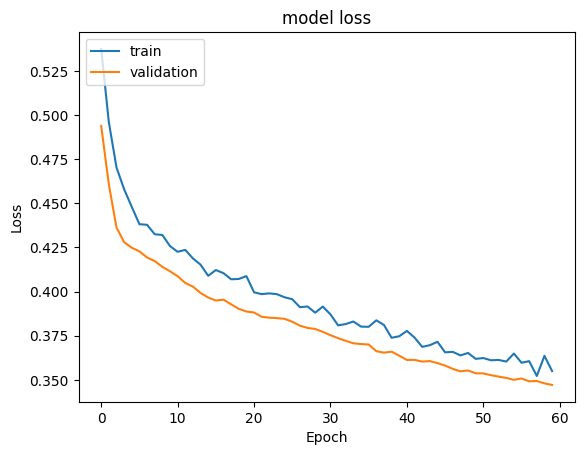

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

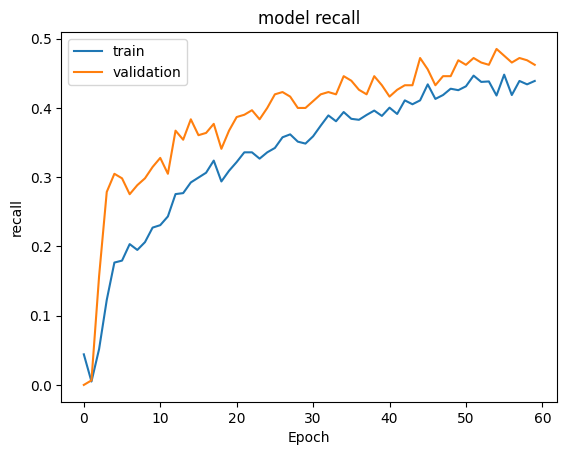

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > thold)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      5574
         1.0       0.70      0.56      0.62      1426

    accuracy                           0.86      7000
   macro avg       0.80      0.75      0.77      7000
weighted avg       0.85      0.86      0.85      7000



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1195
         1.0       0.69      0.54      0.61       305

    accuracy                           0.86      1500
   macro avg       0.79      0.74      0.76      1500
weighted avg       0.85      0.86      0.85      1500



**Confusion matrix**

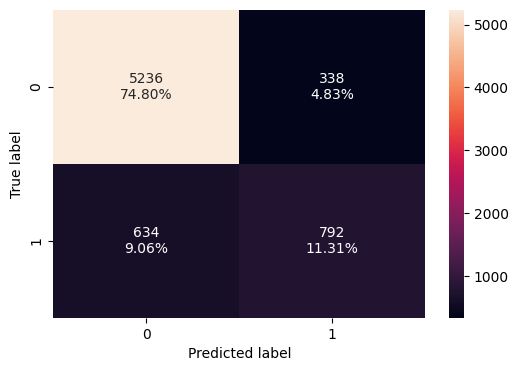

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

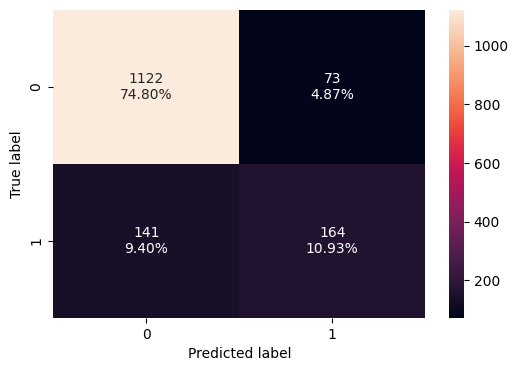

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

In [ ]:
results.loc[2] = [4,[32, 32, 16, 16], ["relu", "relu", "tanh", "relu"],epochs,bsize,"Adam",0.001,"he, Xavier","dropout 0.25,0,0.25,0",history_2.history['loss'][-1],history_2.history['val_loss'][-1],recall_score(y_train,y_train_pred), recall_score(y_val,y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295
1,2,"[64, 32]","[relu, relu]",60,100,Adam,0.001,Xavier,None,0.289691,0.343115,0.636045,0.577049
2,4,"[32, 32, 16, 16]","[relu, relu, tanh, relu]",60,100,Adam,0.001,"he, Xavier","dropout 0.25,0,0.25,0",0.354979,0.347117,0.555400,0.537705


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11148, 11)
After UpSampling, the shape of train_y: (11148,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='tanh'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.9)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=bsize, ## Complete the code to specify the batch size to use
    epochs=epochs, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5932 - recall: 0.6869 - val_loss: 0.5008 - val_recall: 0.6951
Epoch 2/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5076 - recall: 0.7556 - val_loss: 0.4721 - val_recall: 0.7508
Epoch 3/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4603 - recall: 0.7747 - val_loss: 0.4714 - val_recall: 0.7639
Epoch 4/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4492 - recall: 0.7830 - val_loss: 0.4195 - val_recall: 0.7180
Epoch 5/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4367 - recall: 0.7930 - val_loss: 0.4275 - val_recall: 0.7377
Epoch 6/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4253 - recall: 0.8007 - val_loss: 0.4258 - val_recall: 0.7279
Epoch 7/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4149 - recall: 0.8072 - val_loss: 0.4557 - val_recall: 0.7377
Epoch 8/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4098 - recall: 0.8142 - val_loss: 0.4186 - val_recall: 0.7016
Epoch 9

**Loss function**

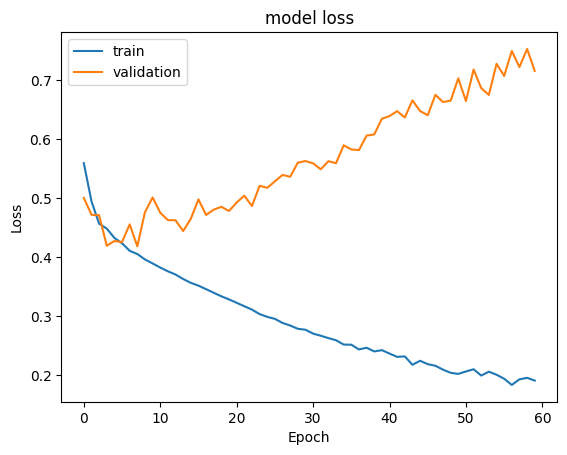

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

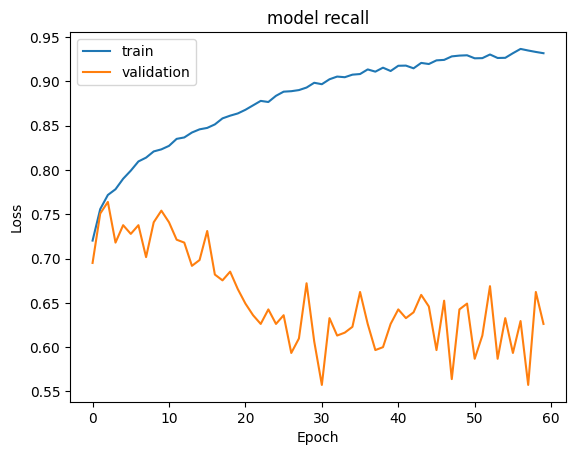

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > thold)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5574
         1.0       0.89      0.95      0.92      5574

    accuracy                           0.91     11148
   macro avg       0.91      0.91      0.91     11148
weighted avg       0.91      0.91      0.91     11148



In [ ]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      1195
         1.0       0.46      0.66      0.54       305

    accuracy                           0.78      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.81      0.78      0.79      1500



**Confusion matrix**

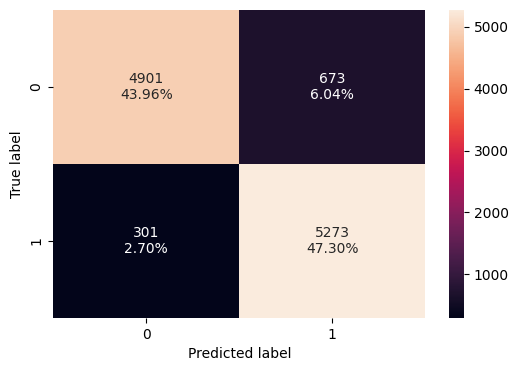

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

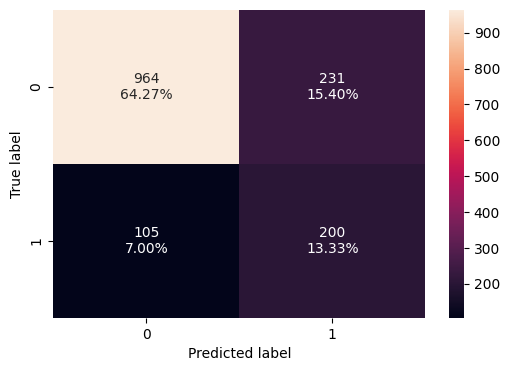

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

In [ ]:
results.loc[3] = [3,[64, 32, 16], ["relu", "tanh", "relu"],epochs,bsize,"SGD with momentum","0.001,0.9","Xavier",None,history_3.history['loss'][-1],history_3.history['val_loss'][-1], recall_score(y_train_smote,y_train_pred), recall_score(y_val,y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295
1,2,"[64, 32]","[relu, relu]",60,100,Adam,0.001,Xavier,None,0.289691,0.343115,0.636045,0.577049
2,4,"[32, 32, 16, 16]","[relu, relu, tanh, relu]",60,100,Adam,0.001,"he, Xavier","dropout 0.25,0,0.25,0",0.354979,0.347117,0.555400,0.537705
3,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,SGD with momentum,"0.001,0.9",Xavier,None,0.190667,0.716149,0.945999,0.655738


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='tanh'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=bsize, ## Complete the code to specify the batch size to use
    epochs=epochs,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6259 - recall: 0.7136 - val_loss: 0.5302 - val_recall: 0.6754
Epoch 2/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5419 - recall: 0.7199 - val_loss: 0.4998 - val_recall: 0.6557
Epoch 3/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5127 - recall: 0.7417 - val_loss: 0.4758 - val_recall: 0.6721
Epoch 4/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4872 - recall: 0.7538 - val_loss: 0.4581 - val_recall: 0.6754
Epoch 5/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4693 - recall: 0.7681 - val_loss: 0.4449 - val_recall: 0.6787
Epoch 6/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4563 - recall: 0.7847 - val_loss: 0.4350 - val_recall: 0.7082
Epoch 7/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4460 - recall: 0.7857 - val_loss: 0.4287 - val_recall: 0.6984
Epoch 8/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4374 - recall: 0.7934 - val_loss: 0.4222 - val_recall: 0.6885
Epoch 9/

**Loss function**

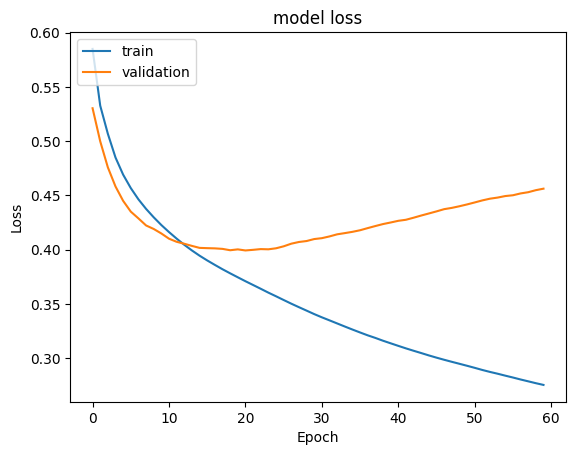

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

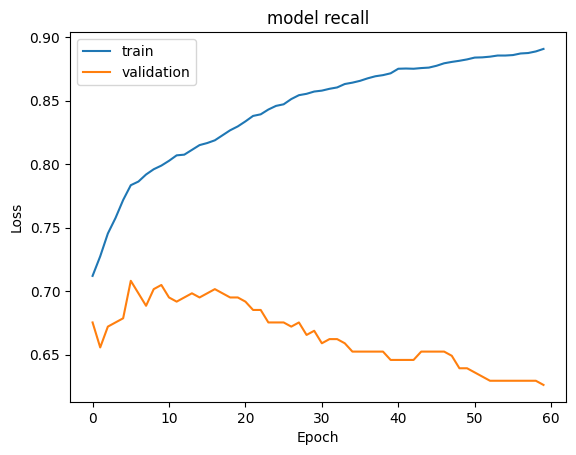

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > thold)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      5574
         1.0       0.88      0.91      0.89      5574

    accuracy                           0.89     11148
   macro avg       0.89      0.89      0.89     11148
weighted avg       0.89      0.89      0.89     11148



In [ ]:
cr=classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      1195
         1.0       0.51      0.67      0.58       305

    accuracy                           0.80      1500
   macro avg       0.71      0.75      0.73      1500
weighted avg       0.83      0.80      0.81      1500



**Confusion matrix**

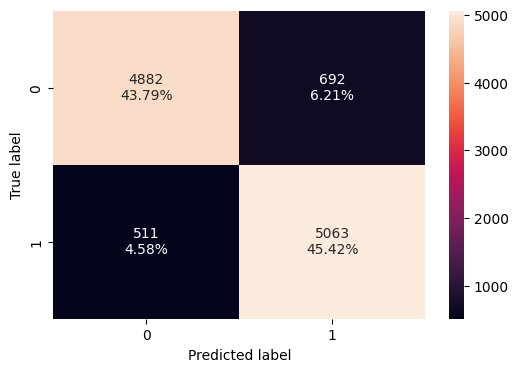

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

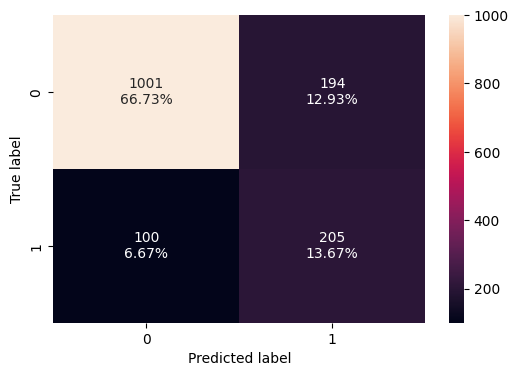

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

In [ ]:
results.loc[4] = [3,[64, 32, 16], ["relu", "tanh", "relu"],epochs,bsize,"Adam",0.001,"Xavier",None,history_4.history['loss'][-1],history_4.history['val_loss'][-1],recall_score(y_train_smote,y_train_pred), recall_score(y_val,y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295
1,2,"[64, 32]","[relu, relu]",60,100,Adam,0.001,Xavier,None,0.289691,0.343115,0.636045,0.577049
2,4,"[32, 32, 16, 16]","[relu, relu, tanh, relu]",60,100,Adam,0.001,"he, Xavier","dropout 0.25,0,0.25,0",0.354979,0.347117,0.555400,0.537705
3,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,SGD with momentum,"0.001,0.9",Xavier,None,0.190667,0.716149,0.945999,0.655738
4,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,Adam,0.001,Xavier,None,0.275264,0.456126,0.908324,0.672131


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1], kernel_initializer='he_normal'))
# add dropout rate
model_5.add(Dropout(0.25))
# add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='tanh'))
# add dropout rate.
model_5.add(Dropout(0.25))
# add hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(16,activation='relu'))
# add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=bsize, ## to specify the batch size to use
    epochs=epochs, ## to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6792 - recall: 0.6684 - val_loss: 0.5732 - val_recall: 0.6164
Epoch 2/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5942 - recall: 0.6599 - val_loss: 0.5649 - val_recall: 0.6623
Epoch 3/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5746 - recall: 0.7070 - val_loss: 0.5496 - val_recall: 0.6689
Epoch 4/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5629 - recall: 0.7245 - val_loss: 0.5371 - val_recall: 0.6623
Epoch 5/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5538 - recall: 0.7161 - val_loss: 0.5406 - val_recall: 0.6689
Epoch 6/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5482 - recall: 0.7199 - val_loss: 0.5174 - val_recall: 0.6557
Epoch 7/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5397 - recall: 0.7328 - val_loss: 0.5198 - val_recall: 0.6623
Epoch 8/60
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5318 - recall: 0.7234 - val_loss: 0.5132 - val_recall: 0.6590
Epoch 9/

**Loss function**

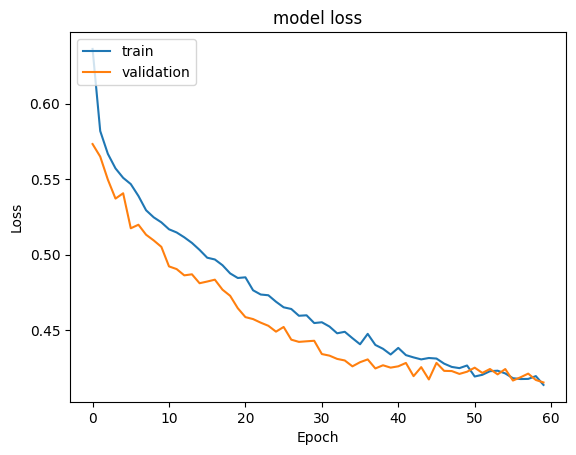

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

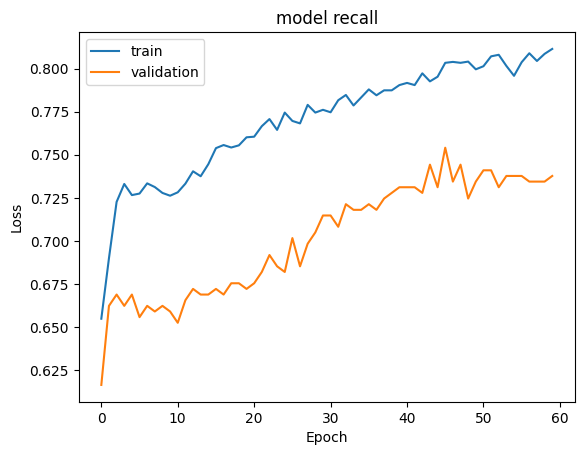

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > thold)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > thold)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81      5574
         1.0       0.79      0.89      0.83      5574

    accuracy                           0.82     11148
   macro avg       0.83      0.82      0.82     11148
weighted avg       0.83      0.82      0.82     11148



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84      1195
         1.0       0.46      0.79      0.58       305

    accuracy                           0.77      1500
   macro avg       0.70      0.78      0.71      1500
weighted avg       0.84      0.77      0.79      1500



**Confusion matrix**

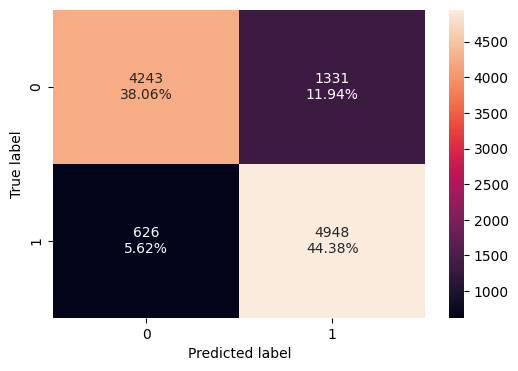

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

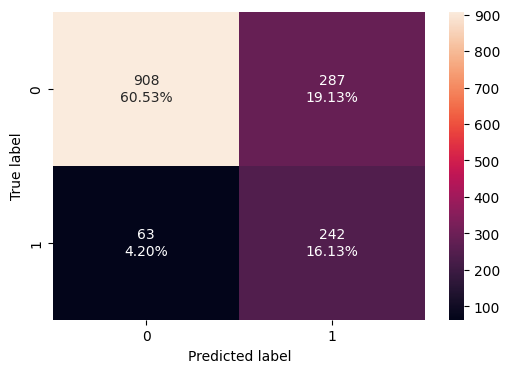

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## to check the model's performance on the validation set

In [ ]:
results.loc[5] = [3,[64, 32, 16], ["relu", "tanh", "relu"],epochs,bsize,"Adam",0.001,"he, Xavier","dropout 0.25,0.25,0",history_5.history['loss'][-1],history_5.history['val_loss'][-1],recall_score(y_train_smote,y_train_pred), recall_score(y_val,y_val_pred)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall
0,2,"[128, 64]","[relu, tanh]",60,100,SGD,0.001,Xavier,None,0.436216,0.440842,0.234222,0.262295
1,2,"[64, 32]","[relu, relu]",60,100,Adam,0.001,Xavier,None,0.289691,0.343115,0.636045,0.577049
2,4,"[32, 32, 16, 16]","[relu, relu, tanh, relu]",60,100,Adam,0.001,"he, Xavier","dropout 0.25,0,0.25,0",0.354979,0.347117,0.555400,0.537705
3,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,SGD with momentum,"0.001,0.9",Xavier,None,0.190667,0.716149,0.945999,0.655738
4,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,Adam,0.001,Xavier,None,0.275264,0.456126,0.908324,0.672131
5,3,"[64, 32, 16]","[relu, tanh, relu]",60,100,Adam,0.001,"he, Xavier","dropout 0.25,0.25,0",0.413738,0.415366,0.887693,0.793443


## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.234222
NN with Adam,0.636045
NN with Adam & Dropout,0.555400
NN with SMOTE & SGD,0.945999
NN with SMOTE & Adam,0.908324
"NN with SMOTE,Adam & Dropout",0.887693


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.262295
NN with Adam,0.577049
NN with Adam & Dropout,0.537705
NN with SMOTE & SGD,0.655738
NN with SMOTE & Adam,0.672131
"NN with SMOTE,Adam & Dropout",0.793443


In [ ]:
train_metric_df.rename(columns={"recall": "train_recall"}, inplace=True)
train_metric_df['validation_recall'] = valid_metric_df['recall']
train_metric_df

,train_recall,validation_recall
NN with SGD,0.234222,0.262295
NN with Adam,0.636045,0.577049
NN with Adam & Dropout,0.555400,0.537705
NN with SMOTE & SGD,0.945999,0.655738
NN with SMOTE & Adam,0.908324,0.672131
"NN with SMOTE,Adam & Dropout",0.887693,0.793443


In [ ]:
train_metric_df - valid_metric_df

,recall,train_recall,validation_recall
NN with SGD,NaN,NaN,NaN
NN with Adam,NaN,NaN,NaN
NN with Adam & Dropout,NaN,NaN,NaN
NN with SMOTE & SGD,NaN,NaN,NaN
NN with SMOTE & Adam,NaN,NaN,NaN
"NN with SMOTE,Adam & Dropout",NaN,NaN,NaN


In [ ]:
y_test_pred = model_5.predict(X_test)    ## to specify the best model
y_test_pred = (y_test_pred > thold)
print(y_test_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82      1194
         1.0       0.43      0.79      0.55       306

    accuracy                           0.74      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.74      0.76      1500



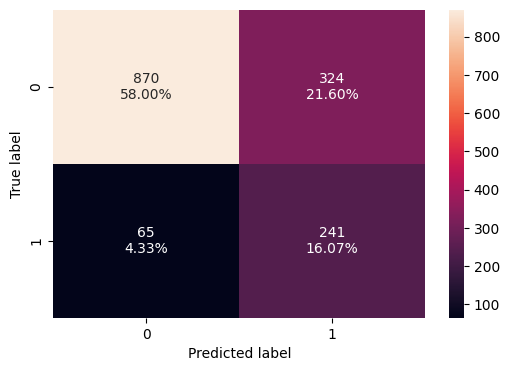

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# The model_5 is a Keras Sequential model. We need to predict probabilities for permutation_importance.
# Permutation importance works with a scoring function. For classification, it's common to use
# a metric like recall, or a metric that's appropriate for probability outputs like ROC AUC.
# Let's use recall for this case, consistent with the problem's focus.

# Defining a scorer function suitable for binary classification probability output
# Permutation importance expects a scorer that takes (estimator, X, y) and returns a score.
# We need to adjust the prediction output to match what recall_score expects (binary labels).
def recall_scorer(estimator, X, y):
    y_pred_prob = estimator.predict(X)
    y_pred = (y_pred_prob > thold).astype(int) # Use the defined threshold to convert probabilities to binary
    return recall_score(y, y_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
47/47 ━━━━━━━━━━━━━━━━━━━

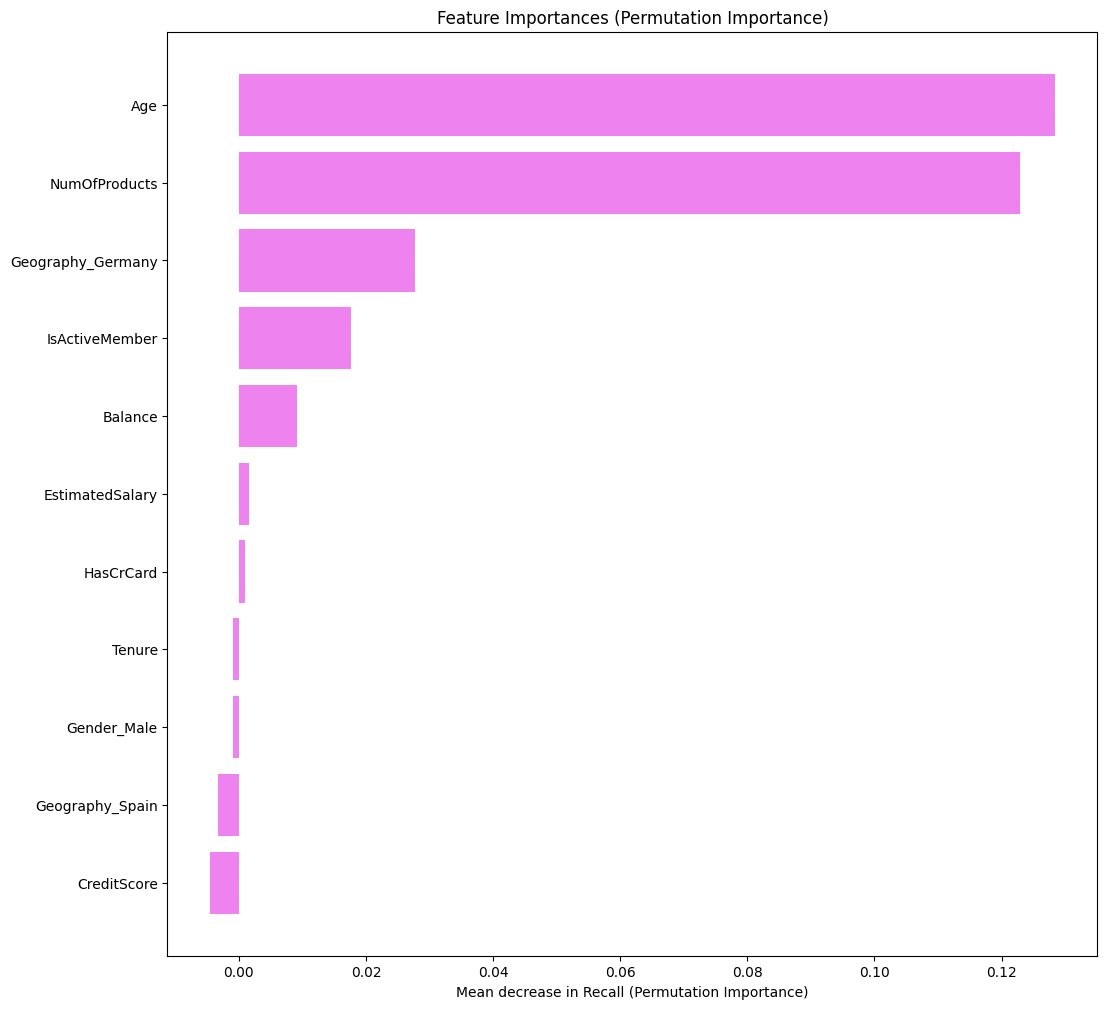

In [ ]:
# Calculating permutation importance
# n_repeats is the number of times to permute a feature. More repeats give a more reliable estimate.
# random_state for reproducibility.
result1 = permutation_importance(model_5, X_test, y_test, scoring=recall_scorer, n_repeats=10, random_state=42)

# Get the importance scores and sort them
importances = result1.importances_mean
indices = np.argsort(importances)

feature_names = X_train.columns

plt.figure(figsize=(12, 12))
plt.title("Feature Importances (Permutation Importance)")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Mean decrease in Recall (Permutation Importance)")
plt.show()

## Actionable Insights and Business Recommendations

* For Model Building, We prioritized the ‘Recall score’ to ensure minimization of False negatives as cost of not identifying a customer about to churn out is higher than incorrectly marking a customer who is willing to stay (False Positive).
* We built six different models where we used a Binary Cross-entropy Loss function, Sigmoid Output Activation function, 2-4 hidden layers with ReLU and tanh activation functions, different weight initializers, SGD (with momentum) & Adam optimizers, dropout rates, batch size of 100 and 60 epochs, so as to find the best fit.
* We found that using SMOTE technique and with Adam optimizer and dropout rates of 0.25 we got the model with the best fit which generalized well between the validation and test set as well as had a good recall score of 80% on both test and validation data.
* Few Recommendations would be:
  - A larger dataset would enable the model to train better and give better output in test phase.
  - The bank’s primary focus should be on creation of new products catering to customers predicted to exit as it seems they are exiting because of not getting right instruments from the bank to invest on.
  - Bank should also campaign towards bringing in new customers due to 20% churn in last 6 months.


<font size=6 color='blue'>Power Ahead</font>
___